In [1]:
library(bnlearn)
library(parallel)

data_numeric = read.table("../data/prediction.train.numeric.warp.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=F)
data_response = read.table("../data/prediction.train.response.warp.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=F)
blacklist = read.table("../data/blacklist.txt", header=T, sep="\t", row.names=1)

In [2]:
data_binary = read.table("../data/prediction.train.binary.warp.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=T)

In [3]:
data_numeric <- as.data.frame(lapply(data_numeric, as.numeric))
data_response <- as.data.frame(lapply(data_response, as.numeric))

In [4]:
# data = dedup(data_numeric, threshold=.95)

In [4]:
# cnames = sample(colnames(data_numeric), 10)
cnames = colnames(data_numeric)
# cnames_response = sample(colnames(data_response), 100)
cnames_response =colnames(data_response)

In [5]:
# dim(data)

In [6]:
data_small <- data_numeric[,cnames]
data_response <- data_response[,cnames_response]

In [7]:
cnames

[1] "StudyDayNo"                                                                                                                                           
  [2] "tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum"          
  [3] "tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum"
  [4] "tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125"             
  [5] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp003447235"                            
  [6] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp900313215"                            
  [7] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Barnesiellaceae.g__Barnesiella.s__Barnesiella_sp003150885"                         
  [8] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_ihumii"                                
  [9] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_indistinctus"                          
 [10] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_sp900240235"                           
 [11] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__UBA11471.g__UBA11471.s__UBA11471_sp000434215"                                      
 [12] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Flavobacteriales.f__UBA1820.g__UBA1820.s__UBA1820_sp002314265"                                      
 [13] "tax.k__Bacteria.p__Desulfobacterota.c__Desulfovibrionia.o__Desulfovibrionales.f__Desulfovibrionaceae.g__Mailhella.s__Mailhella_sp900541395"           
 [14] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Agathobacter.s__Agathobacter_sp000434275"                       
 [15] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Blautia.s__Blautia_sp900541955"                                 
 [16] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp000436535"                         
 [17] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp000437735"                         
 [18] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp900316325"                         
 [19] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__CAG_217.s__CAG_217_sp000436335"                             
 [20] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__Eubacterium_R.s__Eubacterium_R_sp003526845"                 
 [21] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__UBA1691.s__UBA1691_sp900544375"                             
 [22] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Butyricicoccaceae.g__Butyricicoccus.s__Butyricicoccus_sp900547195"                
 [23] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__CAG_272.g__CAG_448.s__CAG_448_sp003150135"                                        
 [24] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Oscillospiraceae.g__CAG_170.s__CAG_170_sp900553545"                               
 [25] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Oscillospiraceae.g__CAG_83.s__CAG_83_sp000435555"                                 
 [26] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia

In [8]:
data = cbind(dedup(data_small, threshold=.95), data_binary, data_response)

In [9]:
blacklist_small <- blacklist[blacklist$from %in% colnames(data),]
blacklist_small <- blacklist_small[blacklist_small$to %in% colnames(data),]

In [10]:
print(dim(blacklist_small))

[1] 37920     2


In [11]:
colnames(data)

[1] "StudyDayNo"                                                                                                                                                        
  [2] "tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum"                       
  [3] "tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum"             
  [4] "tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125"                          
  [5] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp003447235"                                         
  [6] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp900313215"                                         
  [7] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Barnesiellaceae.g__Barnesiella.s__Barnesiella_sp003150885"                                      
  [8] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_ihumii"                                             
  [9] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_indistinctus"                                       
 [10] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_sp900240235"                                        
 [11] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__UBA11471.g__UBA11471.s__UBA11471_sp000434215"                                                   
 [12] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Flavobacteriales.f__UBA1820.g__UBA1820.s__UBA1820_sp002314265"                                                   
 [13] "tax.k__Bacteria.p__Desulfobacterota.c__Desulfovibrionia.o__Desulfovibrionales.f__Desulfovibrionaceae.g__Mailhella.s__Mailhella_sp900541395"                        
 [14] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Agathobacter.s__Agathobacter_sp000434275"                                    
 [15] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Blautia.s__Blautia_sp900541955"                                              
 [16] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp000436535"                                      
 [17] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp000437735"                                      
 [18] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp900316325"                                      
 [19] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__CAG_217.s__CAG_217_sp000436335"                                          
 [20] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__Eubacterium_R.s__Eubacterium_R_sp003526845"                              
 [21] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__UBA1691.s__UBA1691_sp900544375"                                          
 [22] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Butyricicoccaceae.g__Butyricicoccus.s__Butyricicoccus_sp900547195"                             
 [23] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__CAG_272.g__CAG_448.s__CAG_448_sp003150135"                                                     
 [24] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospiral

In [12]:
# blacklist_small

In [13]:
# blacklist_small

In [14]:
# data_small

In [15]:
# data_small = dedup(data_small, threshold=.95)

In [16]:
data

,StudyDayNo,tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum,tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum,tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp003447235,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp900313215,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Barnesiellaceae.g__Barnesiella.s__Barnesiella_sp003150885,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_ihumii,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_indistinctus,tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_sp900240235,⋯,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_267.s__CAG_267_sp001917135,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_495.s__CAG_495_sp000436375,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_495.s__CAG_495_sp001917125,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__RF32.f__CAG_239.g__CAG_495.s__CAG_495_sp900540425,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Mesosutterella.s__Mesosutterella_massiliensis,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Sutterella.s__Sutterella_wadsworthensis,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Sutterella.s__Sutterella_wadsworthensis_A,day_plus_one.tax.k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacterales.f__Enterobacteriaceae.g__Escherichia.s__Escherichia_coli,day_plus_one.tax.k__Bacteria.p__Verrucomicrobiota.c__Verrucomicrobiae.o__Verrucomicrobiales.f__Akkermansiaceae.g__Akkermansia.s__Akkermansia_muciniphila,day_plus_one.tax.k__Bacteria.p__Verrucomicrobiota.c__Verrucomicrobiae.o__Verrucomicrobiales.f__Akkermansiaceae.g__Akkermansia.s__Akkermansia_muciniphila_B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,3,1.8815860,6.266098,0.09353664,-12.47795737,-12.47796,-12.4779574,2.8469065,-1.2932607,-12.4803669,⋯,0.838473796,-12.908055994,-12.908056,-12.9082473,-12.908056,-12.908056,-12.907110,0.35400819,0.98113565,5.99300846
3,4,-0.1141617,3.398695,-12.90454897,-12.90805599,-12.90806,-12.9080560,4.3277427,-12.9041970,-1.7284775,⋯,1.384347201,-12.937864827,-12.937865,-12.1827562,-12.937865,-12.937865,-16.672041,-0.80088430,4.40697117,5.17444560
4,5,-10.0145946,2.489555,-15.60301073,-12.93786483,-12.93786,-12.9378648,4.6474165,-18.4660707,-4.8858497,⋯,0.773744223,-12.711781844,-12.711782,-12.7104224,-12.711782,-12.711782,-12.718505,0.07862995,0.08709675,4.35651547
5,6,-12.7157614,3.114358,-12.71255732,-12.71178184,-12.71178,-12.7117818,4.3563585,-12.7182422,-12.7098724,⋯,-0.847428842,-12.722656823,-12.722657,-12.7271810,-12.722657,-12.722657,-1.539104,2.17210882,-12.72338570,4.69906426
6,7,-0.4472806,3.371808,-12.72284839,-12.72265682,-12.72266,-12.7226568,4.6756737,-0.4458144,-12.7220734,⋯,0.939899892,-13.129479960,-13.129480,-1.2606222,-13.129480,-13.129480,-13.127925,1.45474470,0.12459399,5.09008417
7,8,0.1327485,3.239770,-13.12760962,-13.12947996,-13.12948,-13.1294800,4.4642538,-1.9457325,-13.1345897,⋯,0.543258291,-13.212362833,-13.212363,-2.0229787,-13.212363,-13.212363,-2.

Time difference of 21.90944 secs


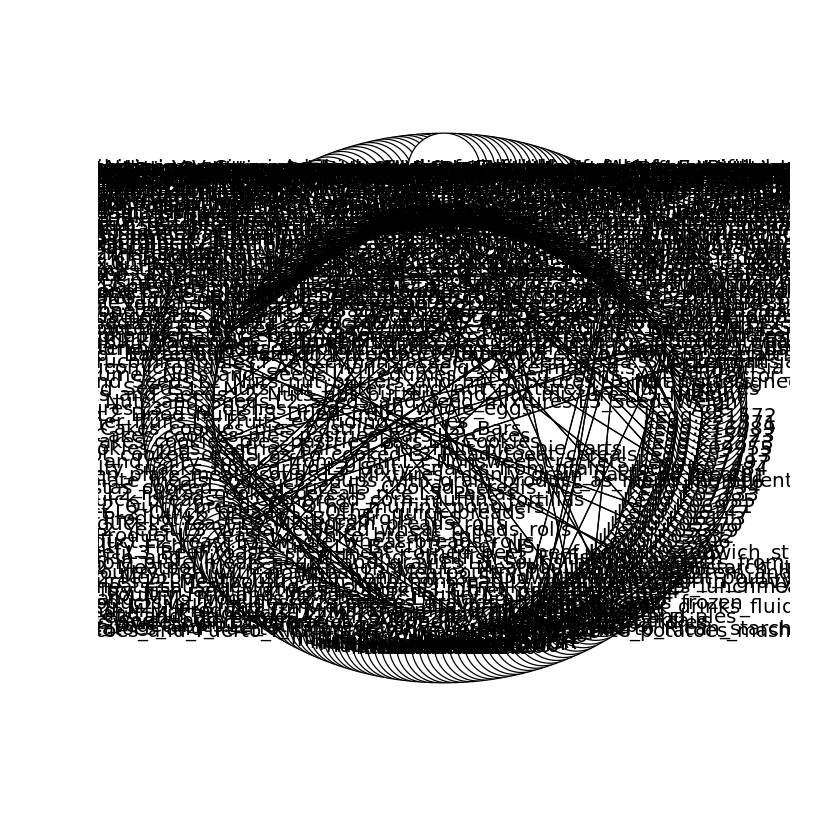

In [17]:
learn.dag <- function() {
    cl = makeCluster(40, type = "SOCK")
    # dag = si.hiton.pc(data_small, cluster = cl, blacklist = blacklist_small, alpha = 0.05, test="mi-cg")
#     dag = si.hiton.pc(data_small, cluster = cl, blacklist = blacklist_small, alpha=0.05, undirected=T, test="cor")
    dag = si.hiton.pc(data, cluster = cl, blacklist = blacklist_small, alpha=0.05, undirected=T)
    # dag = si.hiton.pc(data_small, blacklist = blacklist_small, alpha = 0.05)
    on.exit(stopCluster(cl))
    return(dag)
}


start_time <- Sys.time()
dag <- learn.dag()
end_time <- Sys.time()
amat.data = amat(dag)
plot(dag)
write.table(amat.data, "../results/dag.prediction.train.response.warp.updated.csv", sep="\t")
print(end_time - start_time)

In [18]:
dag


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 223 
  arcs:                                  189 
    undirected arcs:                     189 
    directed arcs:                       0 
  average markov blanket size:           1.70 
  average neighbourhood size:            1.70 
  average branching factor:              0.00 

  learning algorithm:                    Semi-Interleaved HITON-PC 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  475138 


In [19]:
dag$nodes

$StudyDayNo
$StudyDayNo$mb
character(0)

$StudyDayNo$nbr
character(0)

$StudyDayNo$parents
character(0)

$StudyDayNo$children
character(0)


$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum
$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum$mb
[1] "day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum"          
[2] "day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum"

$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum$nbr
[1] "day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum"          
[2] "day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum"

$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum$parents
character(0)

$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum$children
character(0)


$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum
$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum$mb
[1] "kegg.K02004"                                                                                                                                                       
[2] "day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum"
[3] "day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Ruminococcaceae.g__Negativibacillus.s__Negativibacillus_sp000435195"              

$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum$nbr
[1] "kegg.K02004"                                                                                                                                                       
[2] "day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum"
[3] "day_plus_one.tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Ruminococcaceae.g__Negativibacillus.s__Negativibacillus_sp000435195"              

$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum$parents
character(0)

$tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum$children
character(0)


$tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125
$tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125$mb
[1] "day_plus_one.tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125"

$tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125$nbr
[1] "day_plus_one.tax

In [ ]:
# blacklist